Models and corresponding seismic
====

In [1]:
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import matplotlib.ticker as ticker
import matplotlib.colorbar as colorbar
from matplotlib.lines import Line2D
from matplotlib.colors import ListedColormap
from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.legend_handler import HandlerBase
from cycler import cycler
from collections import defaultdict
import numpy as np
import pandas as pd
from sbp_modelling.analysis import envelope
from sbp_modelling.multi_source.analysis import mtd, path, load_run as load_run2, top_horizon, base_horizon, lower_top_horizon, lower_base_horizon
from sbp_modelling.multi_source.model import MultiSourceModel, x_0, x_1, density_0, density_1
from sbp_modelling.multi_source.forward_model import a_x_s, a_z_s, seeds
from string import ascii_lowercase
import os

plt.style.use('./mpl/manuscript.mplstyle')
plt.rcParams['figure.figsize'] = 5, 7
cmap = ListedColormap(['#caf0f8'] + ['#ffe8d6'] * 10 + ['#ddbea9'])

In [2]:
results_path = '../../results/multi-source'

cache = {}

def load_run(*args):
    return load_run2(*args, base_path=results_path)

model = MultiSourceModel()
params = [[(x, 0.05, y) for x in a_x_s] for y in seeds]

_, mtd_x, mtd_z, __, ___ = model.horizons()

# Check files exist
for a_x in a_x_s:
    for a_z in a_z_s:
        for seed in seeds:
            with open(path(a_x, a_z, seed, results_path), 'rb') as f:
                pass

params

[[(10000000.0, 0.05, 3021),
  (1000.0, 0.05, 3021),
  (100.0, 0.05, 3021),
  (10.0, 0.05, 3021),
  (1.0, 0.05, 3021),
  (0.5, 0.05, 3021),
  (0.1, 0.05, 3021),
  (0.05, 0.05, 3021)],
 [(10000000.0, 0.05, 3022),
  (1000.0, 0.05, 3022),
  (100.0, 0.05, 3022),
  (10.0, 0.05, 3022),
  (1.0, 0.05, 3022),
  (0.5, 0.05, 3022),
  (0.1, 0.05, 3022),
  (0.05, 0.05, 3022)],
 [(10000000.0, 0.05, 3023),
  (1000.0, 0.05, 3023),
  (100.0, 0.05, 3023),
  (10.0, 0.05, 3023),
  (1.0, 0.05, 3023),
  (0.5, 0.05, 3023),
  (0.1, 0.05, 3023),
  (0.05, 0.05, 3023)],
 [(10000000.0, 0.05, 3024),
  (1000.0, 0.05, 3024),
  (100.0, 0.05, 3024),
  (10.0, 0.05, 3024),
  (1.0, 0.05, 3024),
  (0.5, 0.05, 3024),
  (0.1, 0.05, 3024),
  (0.05, 0.05, 3024)],
 [(10000000.0, 0.05, 3025),
  (1000.0, 0.05, 3025),
  (100.0, 0.05, 3025),
  (10.0, 0.05, 3025),
  (1.0, 0.05, 3025),
  (0.5, 0.05, 3025),
  (0.1, 0.05, 3025),
  (0.05, 0.05, 3025)]]

In [3]:
twtt, data, sources = load_run(*params[0][0])

source_ind = (sources[:, 0] >= x_0) & (sources[:, 0] <= x_1)
sources = sources[source_ind]

x_ind = (model.x > x_0) & (model.x < x_1)
z_ind = (model.z > 890) & (model.z < 950)
x = model.x[x_ind]
z = model.z[z_ind]

t_start = 120
t_end = 205
t_ind = (twtt >= t_start) & (twtt <= t_end)
t = twtt[t_ind]

data = data[t_ind][:, source_ind]

In [4]:
"""for group in params:
    for param in group:
        load_run(*param)"""

'for group in params:\n    for param in group:\n        load_run(*param)'

In [5]:
def get_pixel_dimensions(ax):
    bbox = ax.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    width, height = bbox.width, bbox.height
    return round(width * fig.dpi), round(height * fig.dpi)

SBP_CACHE_PATH unset
SBP_CACHE_PATH unset
SBP_CACHE_PATH unset
SBP_CACHE_PATH unset
SBP_CACHE_PATH unset
SBP_CACHE_PATH unset
SBP_CACHE_PATH unset
SBP_CACHE_PATH unset
SBP_CACHE_PATH unset
SBP_CACHE_PATH unset
SBP_CACHE_PATH unset
SBP_CACHE_PATH unset
SBP_CACHE_PATH unset
SBP_CACHE_PATH unset
SBP_CACHE_PATH unset
SBP_CACHE_PATH unset


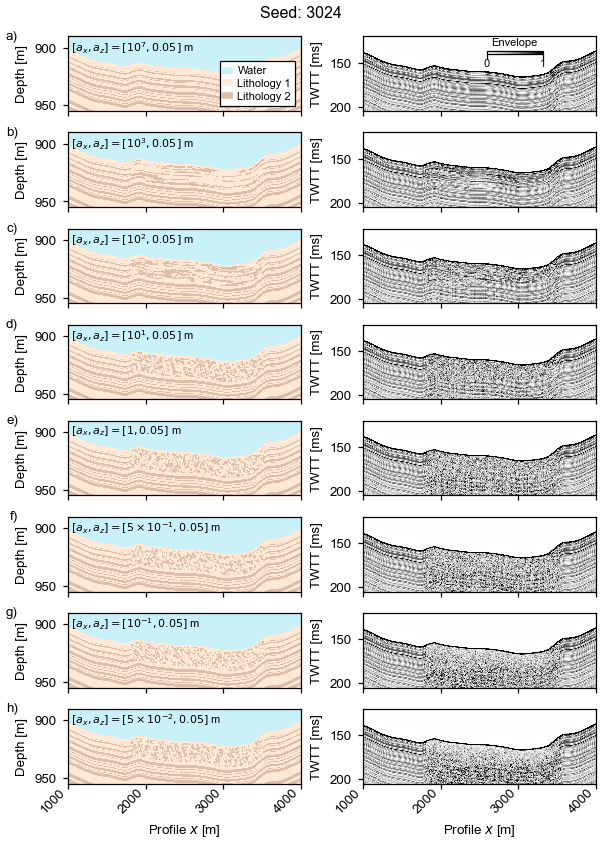

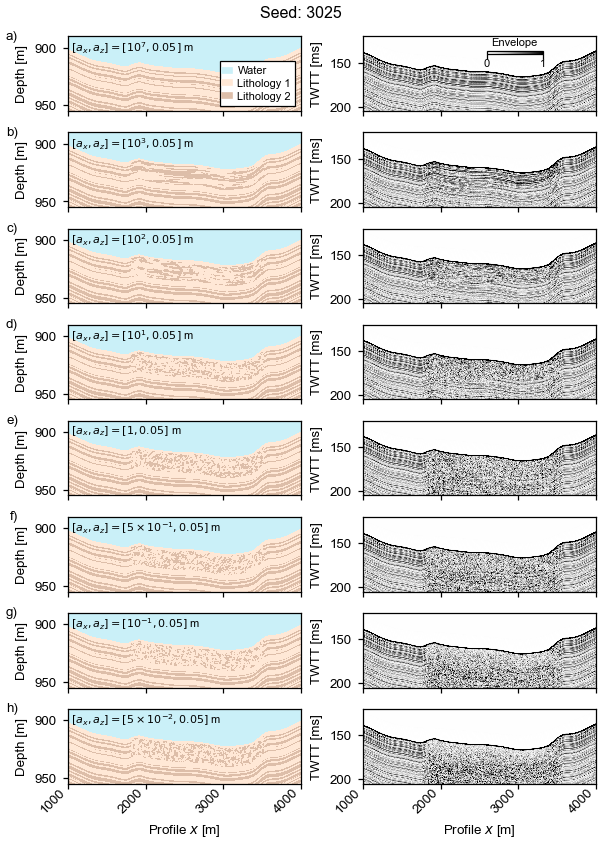

In [8]:
scaling_factor = 5e5

for k in range(len(seeds)):
    fig, ax = plt.subplots(len(a_x_s), 2, constrained_layout=True, sharex=True)
    fig.suptitle(f'Seed: {seeds[k]}')

    mod = ax[:, 0]
    sbp = ax[:, 1]

    lim = 1.

    z0, z1 = 890, 955

    for i, (a_x, a_z, seed) in enumerate(params[k]):
        extent = [model.x.min(), model.x.max(), model.z.max(), model.z.min()]
        width, height = get_pixel_dimensions(mod[i])
        factor = 4
        d_x = (model.x.max() - model.x.min()) / (width * factor)
        d_z = (z1 - z0) / (height * factor)

        m = MultiSourceModel(a_x, a_z, seed, subsampling=(d_x, d_z))
        realisation = mod[i].imshow(m.elastic_model(cache=False)[2].T,
            aspect='auto', extent=extent, cmap=cmap, interpolation='gaussian', vmin=1.0, vmax=density_1)
        mod[i].set(ylim=(z1, z0))
        
        twtt, data2, sources = load_run2(a_x, a_z, seed, base_path='../../results/multi-source')

        last_sbp = sbp[i].imshow(envelope(data2) * scaling_factor, aspect='auto', interpolation='nearest', cmap='Greys',
                     extent=[sources[0, 0], sources[-1, 0], twtt[-1], twtt[0]], vmin=0, vmax=lim)

        mod[i].set(ylabel='Depth [m]', ylim=(z1, z0), xlim=(1000, 4000))
        sbp[i].set(ylabel='TWTT [ms]', ylim=(205, t.min()), xlim=(1000, 4000))        

        sf = ticker.ScalarFormatter(useMathText=True)
        sf.set_powerlimits((-5, 5))
        mod[i].annotate(f'$[a_x, a_z]=[{sf.format_data(a_x)}, {a_z}]$ m', xy=(sources[0, 0], 890), xytext=(2, -2), textcoords='offset points',
                        va='top', ha='left', fontsize='small')

    # Axis labels

    for a in sbp[-1], mod[-1]:
        a.set(xlabel='Profile $x$ [m]')
        plt.setp(a.xaxis.get_majorticklabels(), rotation=45, ha="right", va='bottom', rotation_mode="anchor")

    # Colorbar for SBP images
    
    cbaxes = inset_axes(sbp[0], width="30%", height="5%", loc='upper right', bbox_to_anchor=(0, 0, 0.8, 0.9),
                    bbox_transform=sbp[0].transAxes)
    cbar = fig.colorbar(last_sbp, cax=cbaxes, orientation='horizontal', ticks=(0, lim)) 
    cbar.set_label('Envelope', labelpad=-19, fontsize='small')
    cbar.ax.tick_params(labelsize='small', pad=0)

    lithologies = {
        'Water': Line2D([0], [0], color=cmap(0.), lw=4),
        'Lithology 1': Line2D([0], [0], color=cmap(0.5), lw=4),
        'Lithology 2': Line2D([0], [0], color=cmap(1.), lw=4)
    }
    mod[0].legend(lithologies.values(), lithologies.keys(), handlelength=0.4,
                 loc='lower right', fontsize='small')

    def label_axis(axis, i, offset=(-30, 0)):
        axis.annotate(f'{ascii_lowercase[i]})', xy=(0, 1), xytext=offset, textcoords='offset points', xycoords='axes fraction', va='center', ha='right')

    counter = 0
    for axis in mod:
        label_axis(axis, counter)
        counter += 1

    fig.savefig(f'../../manuscript/figures/si_fig0{k+4}.pdf')